In [28]:
%reload_ext autoreload
%autoreload 2
from chromatopy.tools import ChromAnalyzer


from chromatopy.tools.calibration import Calibrator

# Imports for plotting
from utility import plot_measurments
import matplotlib.pyplot as plt

## Define paths to data

In [29]:
# Define data paths
calibration_path = "data/calibration"
sah_path = "data/sah"
soph_path = "data/soph"

## Read in data from paths

In [30]:
calibration = ChromAnalyzer.read_data(calibration_path)
sah = ChromAnalyzer.read_data(sah_path)
soph = ChromAnalyzer.read_data(soph_path)

In [31]:
soph.measurements[0].chromatograms[0].peaks[0]

Peak(id='d5880010-956c-42fc-b765-bd228859011b', analyte_id=None, retention_time=20.097, timestamp=datetime.datetime(2022, 7, 18, 18, 58, 8), retention_time_unit=Unit(id='2e560ef4-e0ba-43f3-bbbb-bfd104f07add', name='min', bases=[BaseUnit(scale=60.0, kind=Unit("s"), exponent=1.0)]), type=None, peak_start=20.025, peak_end=20.175, width=0.15000000000000213, width_unit=Unit(id='40c16e24-ade1-4975-bd69-4ada63777b66', name='min', bases=[BaseUnit(scale=60.0, kind=Unit("s"), exponent=1.0)]), area=12976.0, area_unit=None, height=3179.0, height_unit=None, percent_area=None, tailing_factor=1.006, separation_factor=0.0)

## Visualize data

In [32]:
# Visualization of the unprocessed calibration chromatograms
plot_measurments(calibration.measurements)

## Define the analyte

In [33]:
# Assign retention time to analyte
calib_analyte = calibration.add_analyte(
    name="name of the calibration analyte",
    retention_time=21.33,
)

## Create calibration object

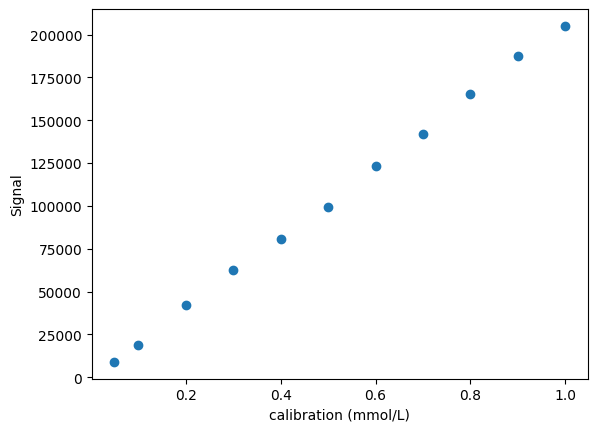

In [42]:
standard = Calibrator(
    species_id="calibration",
    concentrations=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    signals=[peak.area for peak in calib_analyte.peaks],
    conc_unit="mmol/L",
)

standard.calibrate()

standard.plot()

## Calculate the concentration of the analyte